<a href="https://colab.research.google.com/github/Thelirium/Mandacarau.dev-Atividades-individuais/blob/main/atividade_individual_1_warm_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Conhecendo o dataset**

### É composto por 112 features e duas classes binárias, presentes na coluna 'targets'. Assume-se que 1 indica a detecção de uma fraude.

In [ ]:
dataset = pd.read_csv('fraud_detection_bank_dataset.csv')
dataset

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


###Verificando se o dataset possui valores NaN

In [ ]:
dataset.isnull().values.any()

False

### Há desbalancemanto de classes pois, como podemos ver no plot a seguir, a grande maioria das amostras encontram-se na classe 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


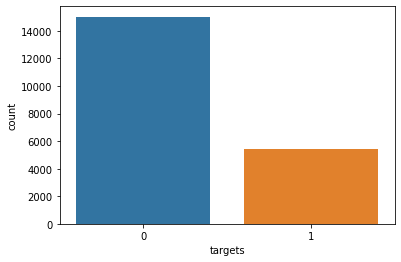

In [ ]:
sns.countplot(dataset['targets'])

###Separando o dataframe conjuntos para treino/teste e validação

In [ ]:
dataset_validation = dataset.sample(frac=0.2, random_state=200)
dataset_validation = dataset_validation.reset_index()
dataset_validation

,index,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,18302,18302,0,31,0,2,0,0,-1,0,...,0,0,0,1,0,0,0,0,5,0
1,13483,13483,0,201,0,1,0,1,7,0,...,0,1,0,1,0,0,0,0,58,0
2,19900,19900,0,187,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
3,7568,7568,1,131,0,1,0,0,7,1,...,0,0,0,0,0,0,0,0,7,0
4,1382,1382,0,71,0,1,0,1,2,0,...,0,1,0,0,0,0,0,0,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,17479,17479,2,78,0,2,0,0,7,2,...,0,0,0,0,0,0,0,0,157,0
4090,17675,17675,0,256,0,4,0,0,-1,0,...,0,0,0,1,1,0,0,0,28,0
4091,13849,13849,0,86,0,2,0,0,7,0,...,0,1,0,0,0,0,0,0,57,0
4092,2573,2573,0,131,1,0,1,0,2,0,...,0,0,0,1,1,0,0,0,28,1


In [ ]:
dataset_train_test = pd.merge(dataset, dataset_validation, how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
dataset_train_test

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
2,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
3,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
4,5,0,11,0,0,1,0,4,0,0,...,0,1,0,0,0,0,1,0,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369,20462,0,53,0,0,0,2,4,0,0,...,0,1,0,1,1,0,0,0,68,0
16370,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
16371,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
16372,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


###Separando as features das classes de saída

In [ ]:
features = dataset_train_test.loc[0:,'col_0':'col_111']
targets = dataset_train_test.loc[0:, 'targets']

In [ ]:
features_validation = dataset_validation.loc[0:,'col_0':'col_111']
targets_validation = dataset_validation.loc[0:, 'targets']

###Separando os conjuntos para treino e teste em uma relação 90%/10%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.1)

#**Primeiro modelo: KNN**


###Construção do modelo. Serão usados valores de K iguais a 1, 5, 10 e 20

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn20 = KNeighborsClassifier(n_neighbors=20)

###Treinando

In [ ]:
knn1.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn10.fit(X_train, y_train)
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

###Testando

In [ ]:
y_pred1 = knn1.predict(X_test)
y_pred5 = knn5.predict(X_test)
y_pred10 = knn10.predict(X_test)
y_pred20 = knn20.predict(X_test)

###Nos resultados de acurácia a seguir, pode-se notar a leve melhora ao subir de apenas 1 para 10 vizinhos, pois agora mais pontos são levados em consideração durante a predição. Contudo, ao subir esse número, exageradamente, para 20 vizinhos, nota-se a queda de performance, pois uma área muito grande de pontos é observada. Isso indica o cuidade que se deve ter ao escolher este número, que não deve ser muito pequeno nem grande

In [ ]:
print("\nK = 1")
print("\nAcurácia:",round(metrics.accuracy_score(y_test, y_pred1)*100, 1), "%")
print("\nF1 Score: ", round(metrics.f1_score(y_test, y_pred1)*100, 1), "%")
print("\nPrecision: ", round(metrics.precision_score(y_test, y_pred1)*100, 1), "%")
print("\nRecall: ", round(metrics.recall_score(y_test, y_pred1)*100, 1), "%")
print("\n=================================================")

print("\nK = 5")
print("\nAcurácia:",round(metrics.accuracy_score(y_test, y_pred5)*100, 1), "%")
print("\nF1 Score: ", round(metrics.f1_score(y_test, y_pred5)*100, 1), "%")
print("\nPrecision: ", round(metrics.precision_score(y_test, y_pred5)*100, 1), "%")
print("\nRecall: ", round(metrics.recall_score(y_test, y_pred5)*100, 1), "%")
print("\n=================================================")

print("\nK = 10")
print("\nAcurácia:",round(metrics.accuracy_score(y_test, y_pred10)*100, 1), "%")
print("\nF1 Score: ", round(metrics.f1_score(y_test, y_pred10)*100, 1), "%")
print("\nPrecision: ", round(metrics.precision_score(y_test, y_pred10)*100, 1), "%")
print("\nRecall: ", round(metrics.recall_score(y_test, y_pred10)*100, 1), "%")
print("\n=================================================")

print("\nK = 20")
print("\nAcurácia:",round(metrics.accuracy_score(y_test, y_pred20)*100, 1), "%")
print("\nF1 Score: ", round(metrics.f1_score(y_test, y_pred20)*100, 1), "%")
print("\nPrecision: ", round(metrics.precision_score(y_test, y_pred20)*100, 1), "%")
print("\nRecall: ", round(metrics.recall_score(y_test, y_pred20)*100, 1), "%")
print("\n=================================================")


K = 1

Acurácia: 81.8 %

F1 Score:  66.8 %

Precision:  65.4 %

Recall:  68.3 %


K = 5

Acurácia: 84.2 %

F1 Score:  68.5 %

Precision:  73.4 %

Recall:  64.2 %


K = 10

Acurácia: 86.0 %

F1 Score:  70.1 %

Precision:  81.6 %

Recall:  61.5 %


K = 20

Acurácia: 84.9 %

F1 Score:  68.7 %

Precision:  77.4 %

Recall:  61.7 %



###Obtenção das métricas com o k-fold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
kfold  = KFold(n_splits=10, shuffle=True) 

results_1 = cross_val_score(knn1, features_validation, targets_validation, cv = kfold)
results_5 = cross_val_score(knn5, features_validation, targets_validation, cv = kfold)
results_10 = cross_val_score(knn10, features_validation, targets_validation, cv = kfold)
results_20 = cross_val_score(knn20, features_validation, targets_validation, cv = kfold)

In [ ]:
print("\nScores KNN 1: {0}".format(results_1))
print("\nMédia: {0}%".format(round( results_1.mean()*100, 1 )))
print("\n=======================================")

print("\nScores KNN 5: {0}".format(results_5))
print("\nMédia: {0}%".format(round( results_5.mean()*100, 1 )))
print("\n=======================================")

print("\nScores KNN 10: {0}".format(results_10))
print("\nMédia: {0}%".format(round( results_10.mean()*100, 1 )))
print("\n=======================================")

print("\nScores KNN 20: {0}".format(results_20))
print("\nMédia: {0}%".format(round( results_20.mean()*100, 1 )))
print("\n=======================================")


Scores KNN 1: [0.80243902 0.79512195 0.80731707 0.81463415 0.8190709  0.78239609
 0.81173594 0.79217604 0.79462103 0.7799511 ]

Média: 80.0%


Scores KNN 5: [0.85853659 0.82439024 0.84146341 0.81707317 0.8606357  0.81173594
 0.8606357  0.83374083 0.82396088 0.83129584]

Média: 83.6%


Scores KNN 10: [0.85853659 0.84146341 0.81463415 0.82195122 0.83618582 0.84352078
 0.83129584 0.83863081 0.89242054 0.84107579]

Média: 84.2%


Scores KNN 20: [0.82682927 0.81463415 0.81219512 0.87560976 0.84841076 0.84841076
 0.82885086 0.82640587 0.83618582 0.86552567]

Média: 83.8%



###Observa-se que o modelo com K = 10 obteve melhores resultados

#**Segundo modelo: Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

###**Usando o modelo com seus características padrões**

In [ ]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_forest = model_forest.predict(X_test)

In [ ]:
print("\nAcurácia:",round(metrics.accuracy_score(y_test, y_pred_forest)*100, 1), "%")
print("\nF1 Score: ", round(metrics.f1_score(y_test, y_pred_forest)*100, 1), "%")
print("\nPrecision: ", round(metrics.precision_score(y_test, y_pred_forest)*100, 1), "%")
print("\nRecall: ", round(metrics.recall_score(y_test, y_pred_forest)*100, 1), "%")
print("\n=================================================")


Acurácia: 92.9 %

F1 Score:  85.6 %

Precision:  93.3 %

Recall:  79.0 %



In [ ]:
results_forest = cross_val_score(model_forest, features_validation, targets_validation, cv = kfold)

In [ ]:
print("\nScores Random Forests: {0}".format(results_forest))
print("\nMédia: {0}%".format(round( results_forest.mean()*100, 1 )))
print("\n=======================================")


Scores Random Forests: [0.94146341 0.91707317 0.92439024 0.93658537 0.9193154  0.88997555
 0.92909535 0.90709046 0.92420538 0.92420538]

Média: 92.1%



###Os resultados acima mostram que, mesmo com os parâmetros padrões que a biblioteca nos oferece, o Random Forests já obtém resultados melhores do que o melhor caso observado quando o KNN foi usado

###**Tentando mellhorar os resultados com variações nos parâmetros**

###Como indicado na própria documentação da scikit-learn ([neste link](https://scikit-learn.org/stable/modules/ensemble.html#forest)) os parâmetros mais modificados são n_estimators (que define a quantidade de árvores que serão criadas) e max_features (que limita a quantidade de features que serão observadas durante a etapa de splitting). Além delas, faremos uso também da max_depth (indicando a profundidade máxima das árvores)

###- Variações no n_estimators:

####A quantidade padrão é de 100 florestas, portanto, será testado com 50, 200 e 250 florestas

In [ ]:
model_forest_50 = RandomForestClassifier(n_estimators = 50)
model_forest_50.fit(X_train, y_train)

model_forest_200 = RandomForestClassifier(n_estimators = 200)
model_forest_200.fit(X_train, y_train)

model_forest_250 = RandomForestClassifier(n_estimators = 250)
model_forest_250.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [ ]:
results_forest_50 = cross_val_score(model_forest_50, features_validation, targets_validation, cv = kfold)
results_forest_200 = cross_val_score(model_forest_200, features_validation, targets_validation, cv = kfold)
results_forest_250 = cross_val_score(model_forest_250, features_validation, targets_validation, cv = kfold)

In [ ]:
print("\nScores Random Forests 50: {0}".format(results_forest_50))
print("\nMédia: {0}%".format(round( results_forest_50.mean()*100, 1 )))
print("\n=======================================")

print("\nScores Random Forests 200: {0}".format(results_forest_200))
print("\nMédia: {0}%".format(round( results_forest_200.mean()*100, 1 )))
print("\n=======================================")

print("\nScores Random Forests 250: {0}".format(results_forest_250))
print("\nMédia: {0}%".format(round( results_forest_250.mean()*100, 1 )))
print("\n=======================================")


Scores Random Forests 50: [0.91707317 0.93414634 0.9097561  0.92195122 0.90709046 0.92665037
 0.92420538 0.90220049 0.92909535 0.90220049]

Média: 91.7%


Scores Random Forests 200: [0.92439024 0.9195122  0.94878049 0.91463415 0.92420538 0.9193154
 0.91687042 0.92665037 0.89731051 0.91198044]

Média: 92.0%


Scores Random Forests 250: [0.92439024 0.89512195 0.94634146 0.92682927 0.94132029 0.8997555
 0.91442543 0.91198044 0.91442543 0.91442543]

Média: 91.9%



###O melhor resultado obtido foi com a criação de 200 florestas, contudo, com apenas 50 um resultado muito próximo foi obtido, levantando a questão se o acréscimo no custo computacional (e temporal) é válido. Para este dataset, não houve muita diferença em relação ao custo, mas para outros casos, a situação pode ser outra

###- Variações no max_features:

####O valor padrão é sqrt(features), ou seja, para esta dataset é 10.6

####Será feito o experimento com log2(features) = 6.8, 20 e none (indicando que não há valor máximo, logo, todas as features são observadas

In [ ]:
model_forest_log2 = RandomForestClassifier(max_features = "log2")
model_forest_log2.fit(X_train, y_train)

model_forest_20 = RandomForestClassifier(max_features = 20)
model_forest_20.fit(X_train, y_train)

model_forest_none = RandomForestClassifier(max_features = None)
model_forest_none.fit(X_train, y_train)

RandomForestClassifier(max_features=None)

In [ ]:
results_forest_log2 = cross_val_score(model_forest_log2, features_validation, targets_validation, cv = kfold)
results_forest_20 = cross_val_score(model_forest_20, features_validation, targets_validation, cv = kfold)
results_forest_none = cross_val_score(model_forest_none, features_validation, targets_validation, cv = kfold)

In [ ]:
print("\nScores Random Forests log2: {0}".format(results_forest_log2))
print("\nMédia: {0}%".format(round( results_forest_log2.mean()*100, 1 )))
print("\n=======================================")

print("\nScores Random Forests 20: {0}".format(results_forest_20))
print("\nMédia: {0}%".format(round( results_forest_20.mean()*100, 1 )))
print("\n=======================================")

print("\nScores Random Forests none: {0}".format(results_forest_none))
print("\nMédia: {0}%".format(round( results_forest_none.mean()*100, 1 )))
print("\n=======================================")


Scores Random Forests log2: [0.91707317 0.89756098 0.92439024 0.89756098 0.93154034 0.93398533
 0.9193154  0.90220049 0.92909535 0.92420538]

Média: 91.8%


Scores Random Forests 20: [0.92926829 0.91707317 0.92682927 0.9195122  0.93154034 0.91442543
 0.92420538 0.9193154  0.92420538 0.8997555 ]

Média: 92.1%


Scores Random Forests none: [0.9195122  0.92926829 0.92682927 0.92439024 0.91442543 0.91198044
 0.90464548 0.92665037 0.90220049 0.92909535]

Média: 91.9%



####Os resultados indicam que 20 features levaram a uma melhoria final. Apesar de ter tido resultado ligeiramente melhor que o log2, o none foi o pior dos 3 pois custou muito mais tempo de execução, sendo de 18.819s, enquanto log2 e 20 obtiveram 2.158s e 3.947s, respectivamente

###- Variações no max_depth:

####O valor padrão é none, ou seja, sem limites, portanto obtemos a seguir a profundidade média das árvores que foram construídas para esse dataset na configuração padrão

In [ ]:
from statistics import mean
mean([tree.tree_.max_depth for tree in model.estimators_])

36.15

####Sabendo disso, o experimento será feito com valores de 5, 10 e 20

In [ ]:
model_forest_d5 = RandomForestClassifier(max_depth = 5)
model_forest_d5.fit(X_train, y_train)

model_forest_d10 = RandomForestClassifier(max_depth = 10)
model_forest_d10.fit(X_train, y_train)

model_forest_d20 = RandomForestClassifier(max_depth = 20)
model_forest_d20.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [ ]:
results_forest_d5 = cross_val_score(model_forest_d5, features_validation, targets_validation, cv = kfold)
results_forest_d10 = cross_val_score(model_forest_d10, features_validation, targets_validation, cv = kfold)
results_forest_d20 = cross_val_score(model_forest_d20, features_validation, targets_validation, cv = kfold)

In [ ]:
print("\nScores Random Forests max_depth 5: {0}".format(results_forest_d5))
print("\nMédia: {0}%".format(round( results_forest_d5.mean()*100, 1 )))
print("\n=======================================")

print("\nScores Random Forests max_depth 10: {0}".format(results_forest_d10))
print("\nMédia: {0}%".format(round( results_forest_d10.mean()*100, 1 )))
print("\n=======================================")

print("\nScores Random Forests max_depth 20: {0}".format(results_forest_d20))
print("\nMédia: {0}%".format(round( results_forest_d20.mean()*100, 1 )))
print("\n=======================================")


Scores Random Forests max_depth 5: [0.84146341 0.91219512 0.91707317 0.90243902 0.8997555  0.8606357
 0.90220049 0.8606357  0.85085575 0.92176039]

Média: 88.7%


Scores Random Forests max_depth 10: [0.93414634 0.93658537 0.9195122  0.90243902 0.91198044 0.9193154
 0.91198044 0.89242054 0.88997555 0.89486553]

Média: 91.1%


Scores Random Forests max_depth 20: [0.90487805 0.92195122 0.90487805 0.9195122  0.91687042 0.95354523
 0.9193154  0.92420538 0.89731051 0.92176039]

Média: 91.8%



####O melhor resultado foi aquele com maior profundidade nas árvores, 20

###- Combinando os melhores resultados em um só modelo:

In [ ]:
model_forest_final = RandomForestClassifier(n_estimators = 200, max_features = 20, max_depth = 20)

In [ ]:
model_forest_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=20, n_estimators=200)

In [ ]:
y_pred_forest_final = model_forest_final.predict(X_test)

In [ ]:
print("\nAcurácia:",round(metrics.accuracy_score(y_test, y_pred_forest_final)*100, 1), "%")
print("\nF1 Score: ", round(metrics.f1_score(y_test, y_pred_forest_final)*100, 1), "%")
print("\nPrecision: ", round(metrics.precision_score(y_test, y_pred_forest_final)*100, 1), "%")
print("\nRecall: ", round(metrics.recall_score(y_test, y_pred_forest_final)*100, 1), "%")
print("\n=================================================")


Acurácia: 93.3 %

F1 Score:  86.8 %

Precision:  91.4 %

Recall:  82.7 %



In [ ]:
results_forest_final = cross_val_score(model_forest_final, features_validation, targets_validation, cv = kfold)

In [ ]:
print("\nScores Random Forests final: {0}".format(results_forest_final))
print("\nMédia: {0}%".format(round( results_forest_final.mean()*100, 1 )))
print("\n=======================================")


Scores Random Forests final: [0.93658537 0.94390244 0.89268293 0.92195122 0.91687042 0.89731051
 0.9193154  0.93398533 0.90953545 0.93154034]

Média: 92.0%



###Comparando o resultado obtido na combinação paramétrica encontrada com aquele advindo da configuração padrão oferecida pela biblioteca, pode-se observar uma ligeira vantagem deste em relação àquele. Para o dataset em questão, a combinação padrão já é suficiente

###Para trabalhos futuros, observa-se que a criação de funções e pipelines é desejável, evitando assim repetição de blocos de código, bem como facilitando a reutilização